In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [21]:
data = 'ASM01.csv'

df = pd.read_csv(data)
df

,STATISTIC Label,Month,Direction,Mode,UNIT,VALUE
0,Air and Sea Travel,2010 January,Arrivals,All modes of transport,Thousand,773.2
1,Air and Sea Travel,2010 January,Arrivals,Air,Thousand,728.4
2,Air and Sea Travel,2010 January,Arrivals,Sea,Thousand,44.8
3,Air and Sea Travel,2010 January,Departures,All modes of transport,Thousand,791.7
4,Air and Sea Travel,2010 January,Departures,Air,Thousand,732.4
...,...,...,...,...,...,...
1009,Air and Sea Travel,2024 January,Arrivals,Air,Thousand,1271.3
1010,Air and Sea Travel,2024 January,Arrivals,Sea,Thousand,31.1
1011,Air and Sea Travel,2024 January,Departures,All modes of transport,Thousand,1281.7
1012,Air and Sea Travel,2024 January,Departures,Air,Thousand,1239.5


In [22]:
# Removing columns STATISTIC Label and UNIT
df = df.drop(['STATISTIC Label', 'UNIT'], axis=1)

# Values in Thousands
#df['VALUE'] = df['VALUE'] * 1000


In [23]:
df

,Month,Direction,Mode,VALUE
0,2010 January,Arrivals,All modes of transport,773.2
1,2010 January,Arrivals,Air,728.4
2,2010 January,Arrivals,Sea,44.8
3,2010 January,Departures,All modes of transport,791.7
4,2010 January,Departures,Air,732.4
...,...,...,...,...
1009,2024 January,Arrivals,Air,1271.3
1010,2024 January,Arrivals,Sea,31.1
1011,2024 January,Departures,All modes of transport,1281.7
1012,2024 January,Departures,Air,1239.5


In [24]:
# Convert the 'Month' column to a datetime object with Year-Month format
df['Year-Month'] = pd.to_datetime(df['Month'], format='%Y %B').dt.strftime('%Y-%m')

In [25]:
df.drop(columns='Month', inplace=True)

In [26]:
df

,Direction,Mode,VALUE,Year-Month
0,Arrivals,All modes of transport,773.2,2010-01
1,Arrivals,Air,728.4,2010-01
2,Arrivals,Sea,44.8,2010-01
3,Departures,All modes of transport,791.7,2010-01
4,Departures,Air,732.4,2010-01
...,...,...,...,...
1009,Arrivals,Air,1271.3,2024-01
1010,Arrivals,Sea,31.1,2024-01
1011,Departures,All modes of transport,1281.7,2024-01
1012,Departures,Air,1239.5,2024-01


In [27]:
# Replacing values in 'Mode' column where 'All modes of transport' to 'Total'
df['Mode'] = df['Mode'].replace('All modes of transport', 'Total')

# Create a new column by joining 'Direction' and 'Mode'
df['Direction-Mode'] = df['Direction'] + " " + df['Mode']

df.drop(columns=['Direction', 'Mode'], inplace=True)

df.head()


,VALUE,Year-Month,Direction-Mode
0,773.2,2010-01,Arrivals Total
1,728.4,2010-01,Arrivals Air
2,44.8,2010-01,Arrivals Sea
3,791.7,2010-01,Departures Total
4,732.4,2010-01,Departures Air


In [28]:
# Pivoting the DataFrame creating new columns with 'VALUE' values
df_pivoted = df.pivot_table(index='Year-Month', columns='Direction-Mode', values='VALUE')

# Removing the label 'Direction-Mode' from the columns
df_pivoted.columns.name = None


In [29]:
# Dataframe cleaned and prepared to perform summarization (All values are numbers)
df_pivoted

,Arrivals Air,Arrivals Sea,Arrivals Total,Departures Air,Departures Sea,Departures Total
Year-Month,,,,,,
2010-01,728.4,44.8,773.2,732.4,59.3,791.7
2010-02,757.2,46.9,804.0,757.2,46.1,803.2
2010-03,906.6,83.3,989.8,919.6,81.5,1001.1
2010-04,735.8,168.7,904.5,709.5,172.5,882.0
2010-05,968.5,146.4,1114.9,977.9,132.9,1110.8
...,...,...,...,...,...,...
2023-09,1814.8,98.7,1913.5,1799.0,111.1,1910.1
2023-10,1742.1,76.5,1818.6,1752.1,77.6,1829.7
2023-11,1352.8,44.5,1397.4,1316.5,45.0,1361.5


In [30]:
df_pivoted.info()

<class 'pandas.core.frame.DataFrame'>
Index: 169 entries, 2010-01 to 2024-01
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Arrivals Air      169 non-null    float64
 1   Arrivals Sea      169 non-null    float64
 2   Arrivals Total    169 non-null    float64
 3   Departures Air    169 non-null    float64
 4   Departures Sea    169 non-null    float64
 5   Departures Total  169 non-null    float64
dtypes: float64(6)
memory usage: 9.2+ KB


In [40]:
df_pivoted.describe().round(2)

,Arrivals Air,Arrivals Sea,Arrivals Total,Departures Air,Departures Sea,Departures Total
count,169.00,169.00,169.00,169.00,169.00,169.00
mean,1129.84,97.66,1227.50,1132.35,97.40,1229.76
std,474.69,63.11,518.13,474.85,60.38,516.41
min,12.10,4.00,16.10,12.80,4.90,17.80
25%,846.00,48.90,911.40,836.50,52.30,895.10
50%,1171.70,87.60,1236.60,1178.50,79.80,1256.40
75%,1450.30,122.50,1576.00,1438.70,127.80,1577.60
max,2070.20,279.50,2270.70,2012.40,278.90,2194.30


In [32]:
# Getting Max Values from each column
max_df = df_pivoted.max()

print("\nMax values for: (Thousands)")
print(max_df)


Max values for: (Thousands)
Arrivals Air        2070.2
Arrivals Sea         279.5
Arrivals Total      2270.7
Departures Air      2012.4
Departures Sea       278.9
Departures Total    2194.3
dtype: float64


In [33]:
# Getting Min Values from each column
min_df = df_pivoted.min()

print("\nMin values for: (Thousands)")
print(min_df)


Min values for: (Thousands)
Arrivals Air        12.1
Arrivals Sea         4.0
Arrivals Total      16.1
Departures Air      12.8
Departures Sea       4.9
Departures Total    17.8
dtype: float64


In [42]:
# Getting Mean Values from each column
mean_df = df_pivoted.mean()

print("\nMean values for: (Thousands)")
print(mean_df)


Mean values for: (Thousands)
Arrivals Air        1129.835503
Arrivals Sea          97.657988
Arrivals Total      1227.495858
Departures Air      1132.353254
Departures Sea        97.401183
Departures Total    1229.757396
dtype: float64


In [43]:
# Getting Median Values from each column
median_df = df_pivoted.median()

print("\nMedian values for: (Thousands)")
print(median_df)


Median values for: (Thousands)
Arrivals Air        1171.7
Arrivals Sea          87.6
Arrivals Total      1236.6
Departures Air      1178.5
Departures Sea        79.8
Departures Total    1256.4
dtype: float64


In [52]:
# Getting Mode Value(s) from each column
mode_df = df_pivoted.mode()

#print("\nMode values for: (Thousands)")
mode_df

#mode = df_pivoted['Departures Total'].mode()

#print(mode)

#Too many modes because its a time series dataframe

,Arrivals Air,Arrivals Sea,Arrivals Total,Departures Air,Departures Sea,Departures Total
0,1646.3,31.3,1214.8,700.5,56.3,17.8
1,NaN,84.3,1235.1,709.5,NaN,36.3
2,NaN,86.8,1523.2,NaN,NaN,53.2
3,NaN,115.3,NaN,NaN,NaN,66.5
4,NaN,119.9,NaN,NaN,NaN,73.0
...,...,...,...,...,...,...
164,NaN,NaN,NaN,NaN,NaN,2116.8
165,NaN,NaN,NaN,NaN,NaN,2177.2
166,NaN,NaN,NaN,NaN,NaN,2183.9
167,NaN,NaN,NaN,NaN,NaN,2191.9


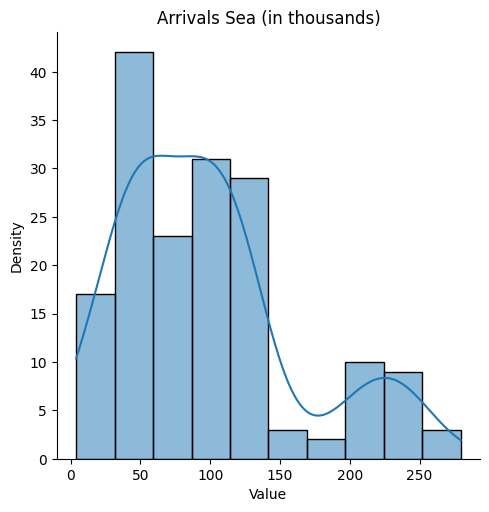

In [62]:
data = df_pivoted['Arrivals Sea']

#sns.distplot(data, bins=10, hist=True, kde=True, label = 'Arrivals Total (in thousands)')
sns.displot(data, bins=10, kde=True)

plt.title('Arrivals Sea (in thousands)')
plt.xlabel('Value')
plt.ylabel('Density')
#plt.legend(labels=['Arrivals Total (in thousands)'])
plt.show()

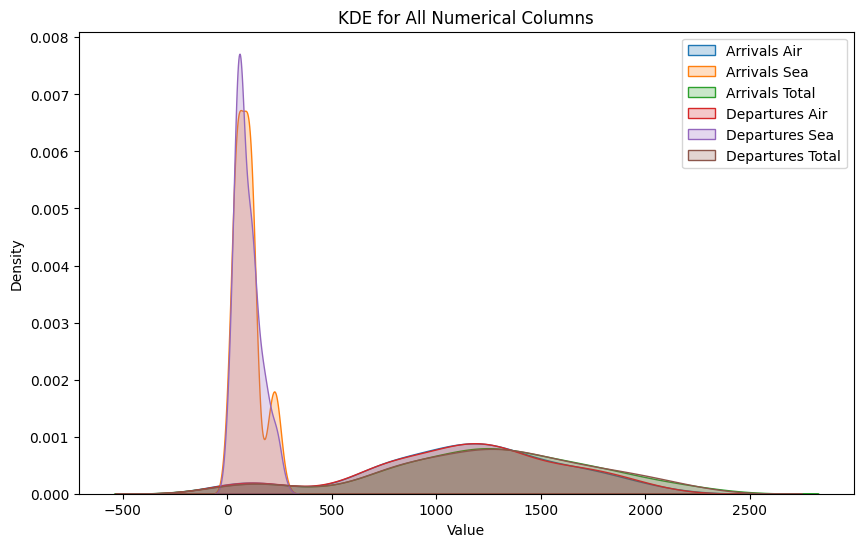

In [65]:
plt.figure(figsize=(10, 6))  # Set the figure size for better readability

for column in df_pivoted.columns:
    # Check if the column is numerical
    if df_pivoted[column].dtype in ['int64', 'float64']:
        sns.kdeplot(df_pivoted[column], fill=True, label=column)

plt.title('KDE for All Numerical Columns')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()

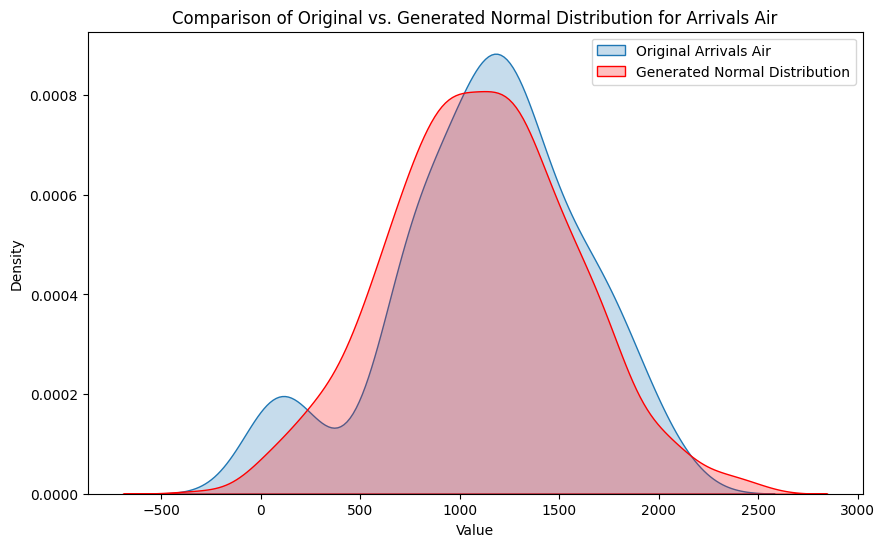

In [67]:
import numpy as np

# Calculate the mean and standard deviation of the 'Arrivals - Air' column
mean_arrivals_air = df_pivoted['Arrivals Air'].mean()
std_arrivals_air = df_pivoted['Arrivals Air'].std()

# Generate a normally distributed dataset with the same mean and standard deviation
normal_arrivals_air = np.random.normal(loc=mean_arrivals_air, scale=std_arrivals_air, size=1000)

# Example: Plot the original data vs. the generated normal distribution
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.kdeplot(df_pivoted['Arrivals Air'], fill=True, label='Original Arrivals Air')
sns.kdeplot(normal_arrivals_air, fill=True, label='Generated Normal Distribution', color='red')
plt.legend()
plt.title('Comparison of Original vs. Generated Normal Distribution for Arrivals Air')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()


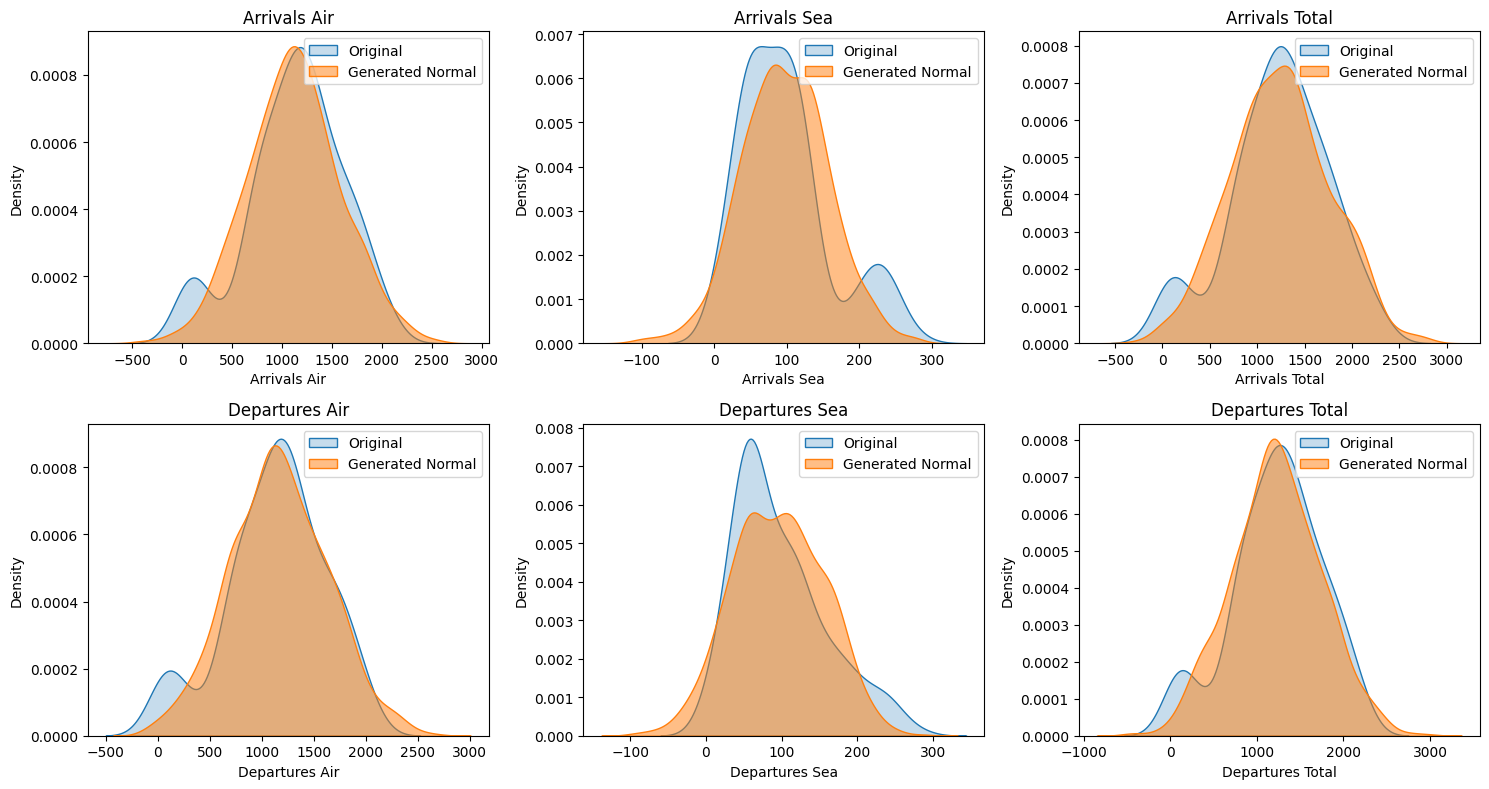

In [69]:
num_columns = df_pivoted.shape[1]
n_cols = 3  # Number of columns in the plot grid
n_rows = (num_columns + n_cols - 1) // n_cols  # Calculate required number of rows

plt.figure(figsize=(n_cols * 5, n_rows * 4))  # Adjust figure size as needed

for i, column in enumerate(df_pivoted.columns, 1):
    plt.subplot(n_rows, n_cols, i)
    
    # Original data KDE
    sns.kdeplot(df_pivoted[column], fill=True, label='Original')
    
    # Generated normal distribution data based on the column's mean and std
    mean = df_pivoted[column].mean()
    std = df_pivoted[column].std()
    normal_data = np.random.normal(loc=mean, scale=std, size=1000)
    sns.kdeplot(normal_data, fill=True, label='Generated Normal', alpha=0.5)
    
    plt.title(column)
    plt.legend()
    plt.tight_layout()

plt.show()

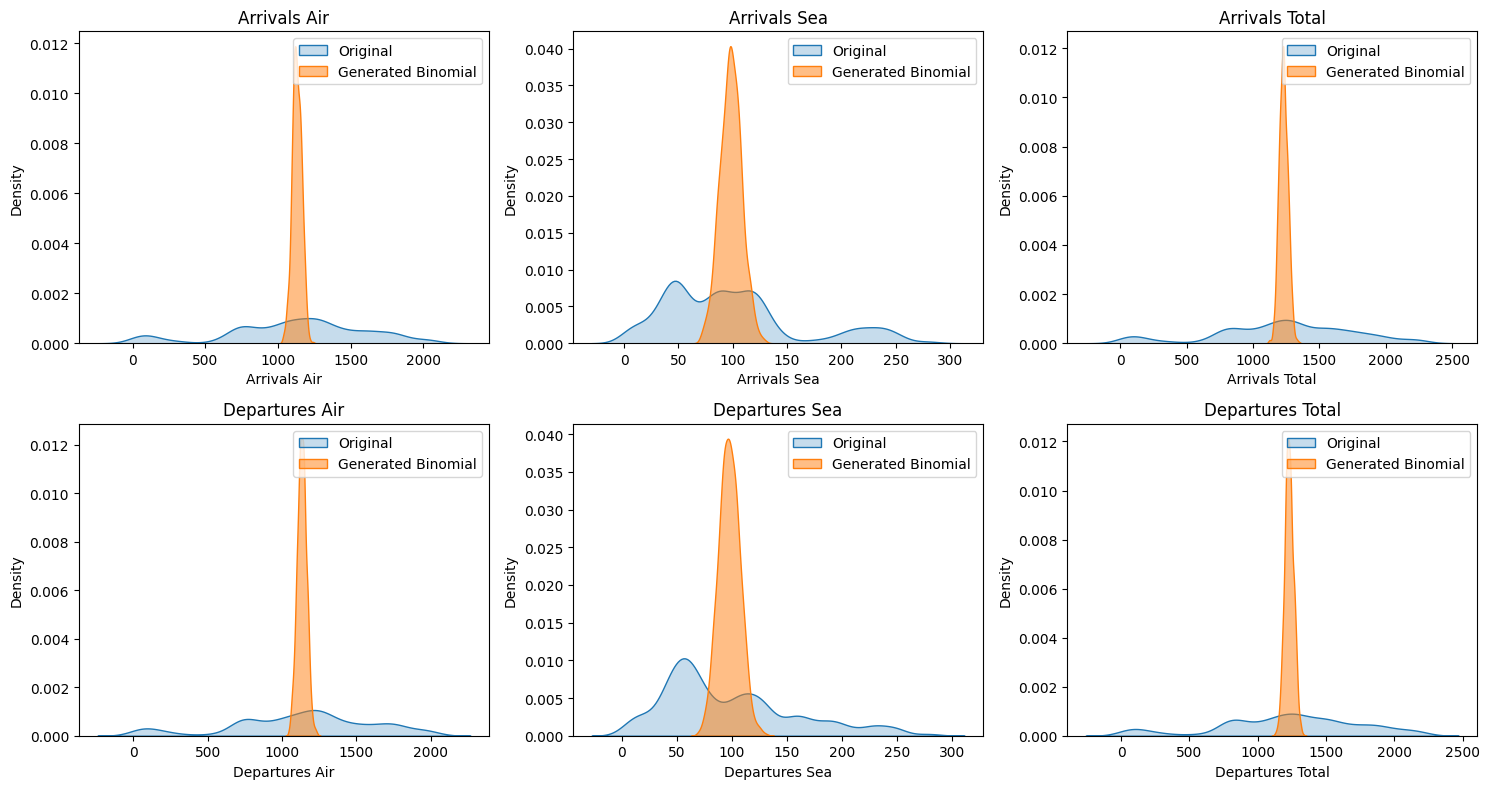

In [74]:
n = 10000  # Fixed number of trials for the binomial distribution
n_cols = 3  # Number of columns in the plot grid
num_columns = df_pivoted.shape[1]
n_rows = (num_columns + n_cols - 1) // n_cols  # Calculate required number of rows

plt.figure(figsize=(n_cols * 5, n_rows * 4))  # Adjust figure size as needed

for i, column in enumerate(df_pivoted.columns, 1):
    plt.subplot(n_rows, n_cols, i)
    
    # Original data KDE
    sns.kdeplot(df_pivoted[column], fill=True, label='Original', bw_adjust=0.5)
    
    # Approximating 'p' for binomial distribution
    mean = df_pivoted[column].mean()
    p = mean / n  # Simplified approximation, assuming the mean can directly translate to success probability
    
    # Adjust 'p' to not exceed 1 in cases where this method oversimplifies
    p = min(p, 1)
    
    # Generated binomial distribution data
    binomial_data = np.random.binomial(n, p, size=1000)
    sns.kdeplot(binomial_data, fill=True, label='Generated Binomial', alpha=0.5)
    
    plt.title(column)
    plt.legend()
    plt.tight_layout()

plt.show()

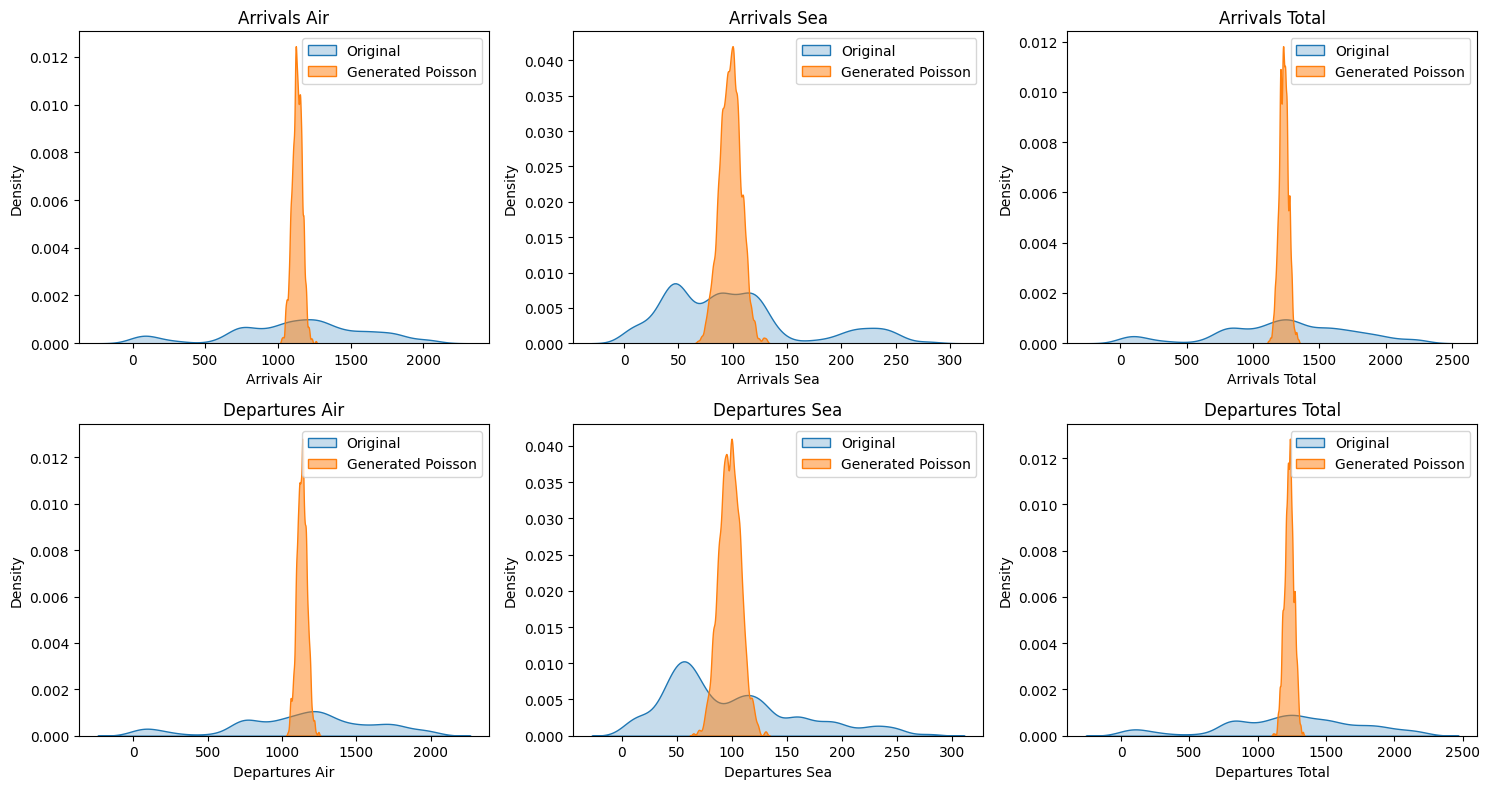

In [76]:
n_cols = 3  # Number of columns in the plot grid
num_columns = df_pivoted.shape[1]
n_rows = (num_columns + n_cols - 1) // n_cols  # Calculate required number of rows

plt.figure(figsize=(n_cols * 5, n_rows * 4))  # Adjust figure size as needed

for i, column in enumerate(df_pivoted.columns, 1):
    plt.subplot(n_rows, n_cols, i)
    
    # Original data KDE
    sns.kdeplot(df_pivoted[column], fill=True, label='Original', bw_adjust=0.5)
    
    # Calculate lambda (mean) for the Poisson distribution from the original data
    lambda_param = df_pivoted[column].mean()
    
    # Generated Poisson distribution data based on the column's mean
    poisson_data = np.random.poisson(lam=lambda_param, size=1000)
    sns.kdeplot(poisson_data, fill=True, label='Generated Poisson', alpha=0.5, bw_adjust=0.5)
    
    plt.title(column)
    plt.legend()
    plt.tight_layout()

plt.show()